In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
uber = pd.read_csv('My Uber Drives - 2016.csv')

In [3]:
df=pd.DataFrame(uber)

In [4]:
df.columns=df.columns.str.replace("*","")
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [5]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [6]:
df.drop(1155,inplace=True)

In [7]:
(df.isnull().sum()/len(df))*100

START_DATE     0.000000
END_DATE       0.000000
CATEGORY       0.000000
START          0.000000
STOP           0.000000
MILES          0.000000
PURPOSE       43.463203
dtype: float64

In [8]:
df['PURPOSE']=df['PURPOSE'].fillna(method='ffill',axis=0)

In [9]:
miles=df.groupby(['MILES'])

In [10]:
(df['MILES']).mean()

10.566839826839812

In [11]:
(df['MILES']<25).value_counts()

True     1090
False      65
Name: MILES, dtype: int64

In [12]:
(df.groupby(['PURPOSE'])['MILES']).mean()

PURPOSE
Airport/Travel      14.953704
Between Offices     10.944444
Charity ($)         15.100000
Commute            180.200000
Customer Visit      16.065806
Errand/Supplies      5.928902
Meal/Entertain       5.773878
Meeting             12.652597
Moving               4.550000
Temporary Site      11.016327
Name: MILES, dtype: float64

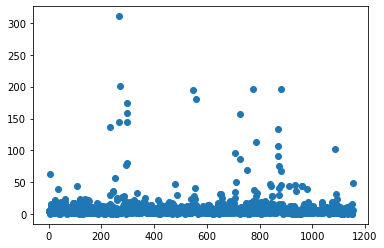

In [278]:
plt.scatter(df.index,df['MILES'])

In [13]:
df.sort_values('MILES')

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
420,6/8/2016 17:16,6/8/2016 17:18,Business,Soho,Tribeca,0.5,Errand/Supplies
44,1/26/2016 17:27,1/26/2016 17:29,Business,Cary,Cary,0.5,Errand/Supplies
120,2/17/2016 16:38,2/17/2016 16:43,Business,Katunayaka,Katunayaka,0.5,Errand/Supplies
1111,12/25/2016 0:10,12/25/2016 0:14,Business,Lahore,Lahore,0.6,Errand/Supplies
1110,12/24/2016 22:04,12/24/2016 22:09,Business,Lahore,Lahore,0.6,Errand/Supplies
...,...,...,...,...,...,...,...
546,7/14/2016 16:39,7/14/2016 20:05,Business,Morrisville,Banner Elk,195.3,Errand/Supplies
776,9/27/2016 21:01,9/28/2016 2:37,Business,Unknown Location,Unknown Location,195.6,Temporary Site
881,10/30/2016 15:22,10/30/2016 18:23,Business,Asheville,Mebane,195.9,Meeting
270,3/25/2016 22:54,3/26/2016 1:39,Business,Jacksonville,Kissimmee,201.0,Meeting


In [265]:
df.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [15]:
df['PURPOSE'].value_counts()


Meeting            308
Meal/Entertain     245
Temporary Site     196
Errand/Supplies    173
Customer Visit     155
Airport/Travel      54
Between Offices     18
Moving               4
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

In [16]:
start=df['START'].value_counts

In [17]:
start

<bound method IndexOpsMixin.value_counts of 0            Fort Pierce
1            Fort Pierce
2            Fort Pierce
3            Fort Pierce
4            Fort Pierce
              ...       
1150             Kar?chi
1151             Kar?chi
1152    Unknown Location
1153          Katunayake
1154             Gampaha
Name: START, Length: 1155, dtype: object>

In [18]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'],errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'],errors='coerce')

In [158]:
df['DURATION']=df['END_DATE']-df['START_DATE']
df['DURATION']=df['DURATION'].dt.total_seconds()/60
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DURATION,roundtrip,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,True,jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,True,jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,True,jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,True,jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,False,jan
...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,True,dec
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,False,dec
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,True,dec
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,False,dec


In [20]:
df['DURATION'].mean()

23.243290043290042

In [129]:
df['roundtrip']=df['START']==df['STOP']

In [174]:
a=df[df['roundtrip']==True]
a['PURPOSE'].value_counts()
df[df['month']=='dec'].groupby(['month','PURPOSE','roundtrip'])['month'].count()

month  PURPOSE          roundtrip
dec    Airport/Travel   True          2
       Between Offices  True          1
       Customer Visit   False        16
                        True         10
       Errand/Supplies  False        11
                        True         36
       Meal/Entertain   False        18
                        True         13
       Meeting          False        12
                        True         18
       Temporary Site   False         6
                        True          3
Name: month, dtype: int64

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176]),
 

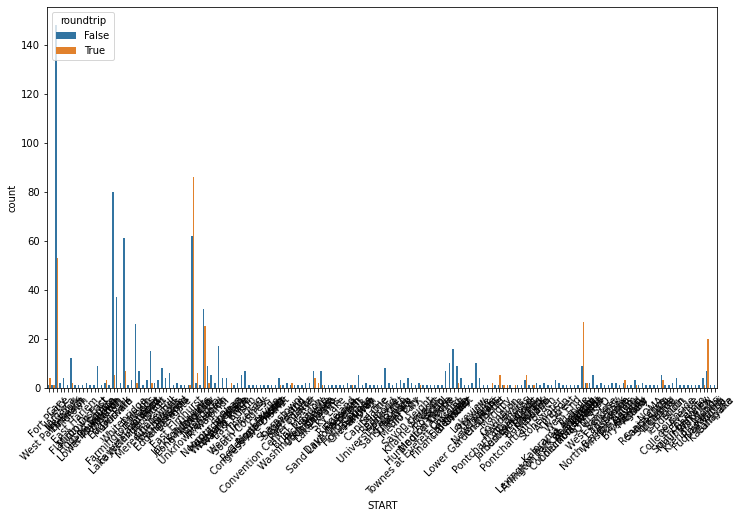

In [134]:
plt.figure(figsize=(12,7))
sns.countplot(x=df['START'],hue=df['roundtrip'])
plt.xticks(rotation=45)

In [139]:
df['month']=pd.DatetimeIndex(df['START_DATE']).month
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DURATION,roundtrip,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,True,1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,True,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,True,1
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,True,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,False,1
...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,True,12
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,False,12
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,True,12
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,False,12


In [136]:
dic={1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'july',8:'aug',9:'sept', 10:'oct', 11:'nov', 12:'dec'}

In [140]:
df['month']=df['month'].map(dic)
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DURATION,roundtrip,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,True,jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,True,jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,True,jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,True,jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,False,jan
...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,True,dec
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,False,dec
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,True,dec
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,False,dec


<AxesSubplot:xlabel='month', ylabel='count'>

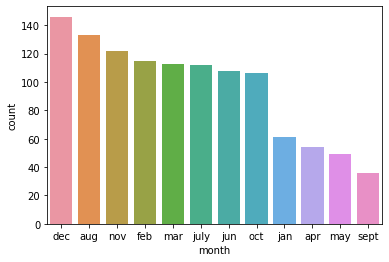

In [145]:
sns.countplot(df['month'],order=df['month'].value_counts().index)

In [154]:
a=df[df['roundtrip']==True]
a['month'].value_counts()

july    101
mar      99
jun      97
nov      96
feb      86
aug      86
oct      82
dec      63
apr      49
may      49
jan      44
sept     15
Name: month, dtype: int64

In [156]:
df.groupby(['month','roundtrip'])['month'].count()

month  roundtrip
apr    False         49
       True           5
aug    False         86
       True          47
dec    False         63
       True          83
feb    False         86
       True          29
jan    False         44
       True          17
july   False        101
       True          11
jun    False         97
       True          11
mar    False         99
       True          14
may    False         49
nov    False         96
       True          26
oct    False         82
       True          24
sept   False         15
       True          21
Name: month, dtype: int64

<AxesSubplot:xlabel='MILES', ylabel='DURATION'>

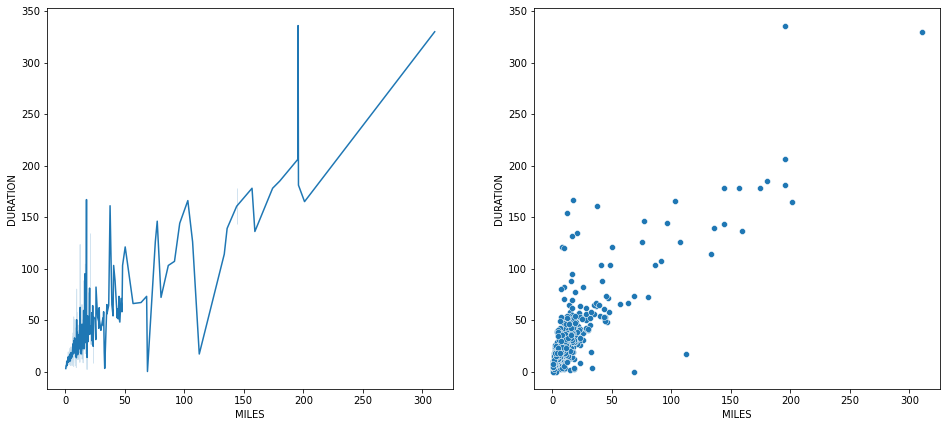

In [177]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.lineplot(data=df,x=df.MILES,y=df.DURATION)
plt.subplot(1,2,2)
sns.scatterplot(data=df,x=df.MILES,y=df.DURATION)


<AxesSubplot:xlabel='CATEGORY', ylabel='count'>

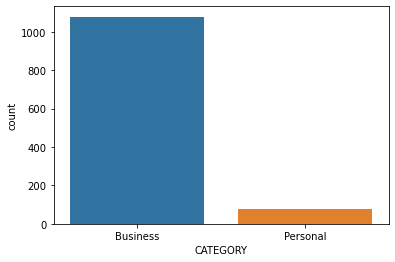

In [210]:
sns.countplot(df['CATEGORY'],order=df['CATEGORY'].value_counts().index)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

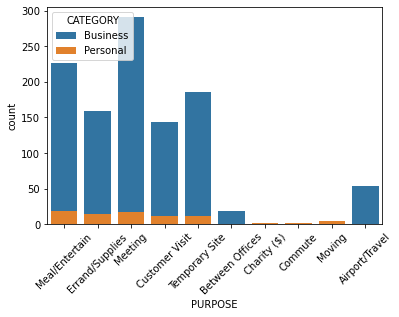

In [222]:
A=df.groupby(['PURPOSE'])['CATEGORY']
# A.value_counts()
sns.countplot(x='PURPOSE',hue='CATEGORY',data=df,dodge=False)
plt.xticks(rotation=45)